In [1]:
"""
Notebook Matrix Profile – ampiimts Python 3.11 package

Goal:
From pre processing signal with original value, normalize value, timestamp. 
We identify discord and motifs with a fix window on matrix profile methode (stumpy.maamp)
"""
# %matplotlib widget

import pandas as pd
import ampiimts


[WINDOW] Fenêtre utilisateur → 24h
[MDL] Dimensions retenues : [np.int64(8), np.int64(6), np.int64(7), np.int64(1)] sur [0, 1, 2, 3, 4, 5, 6, 7, 8]


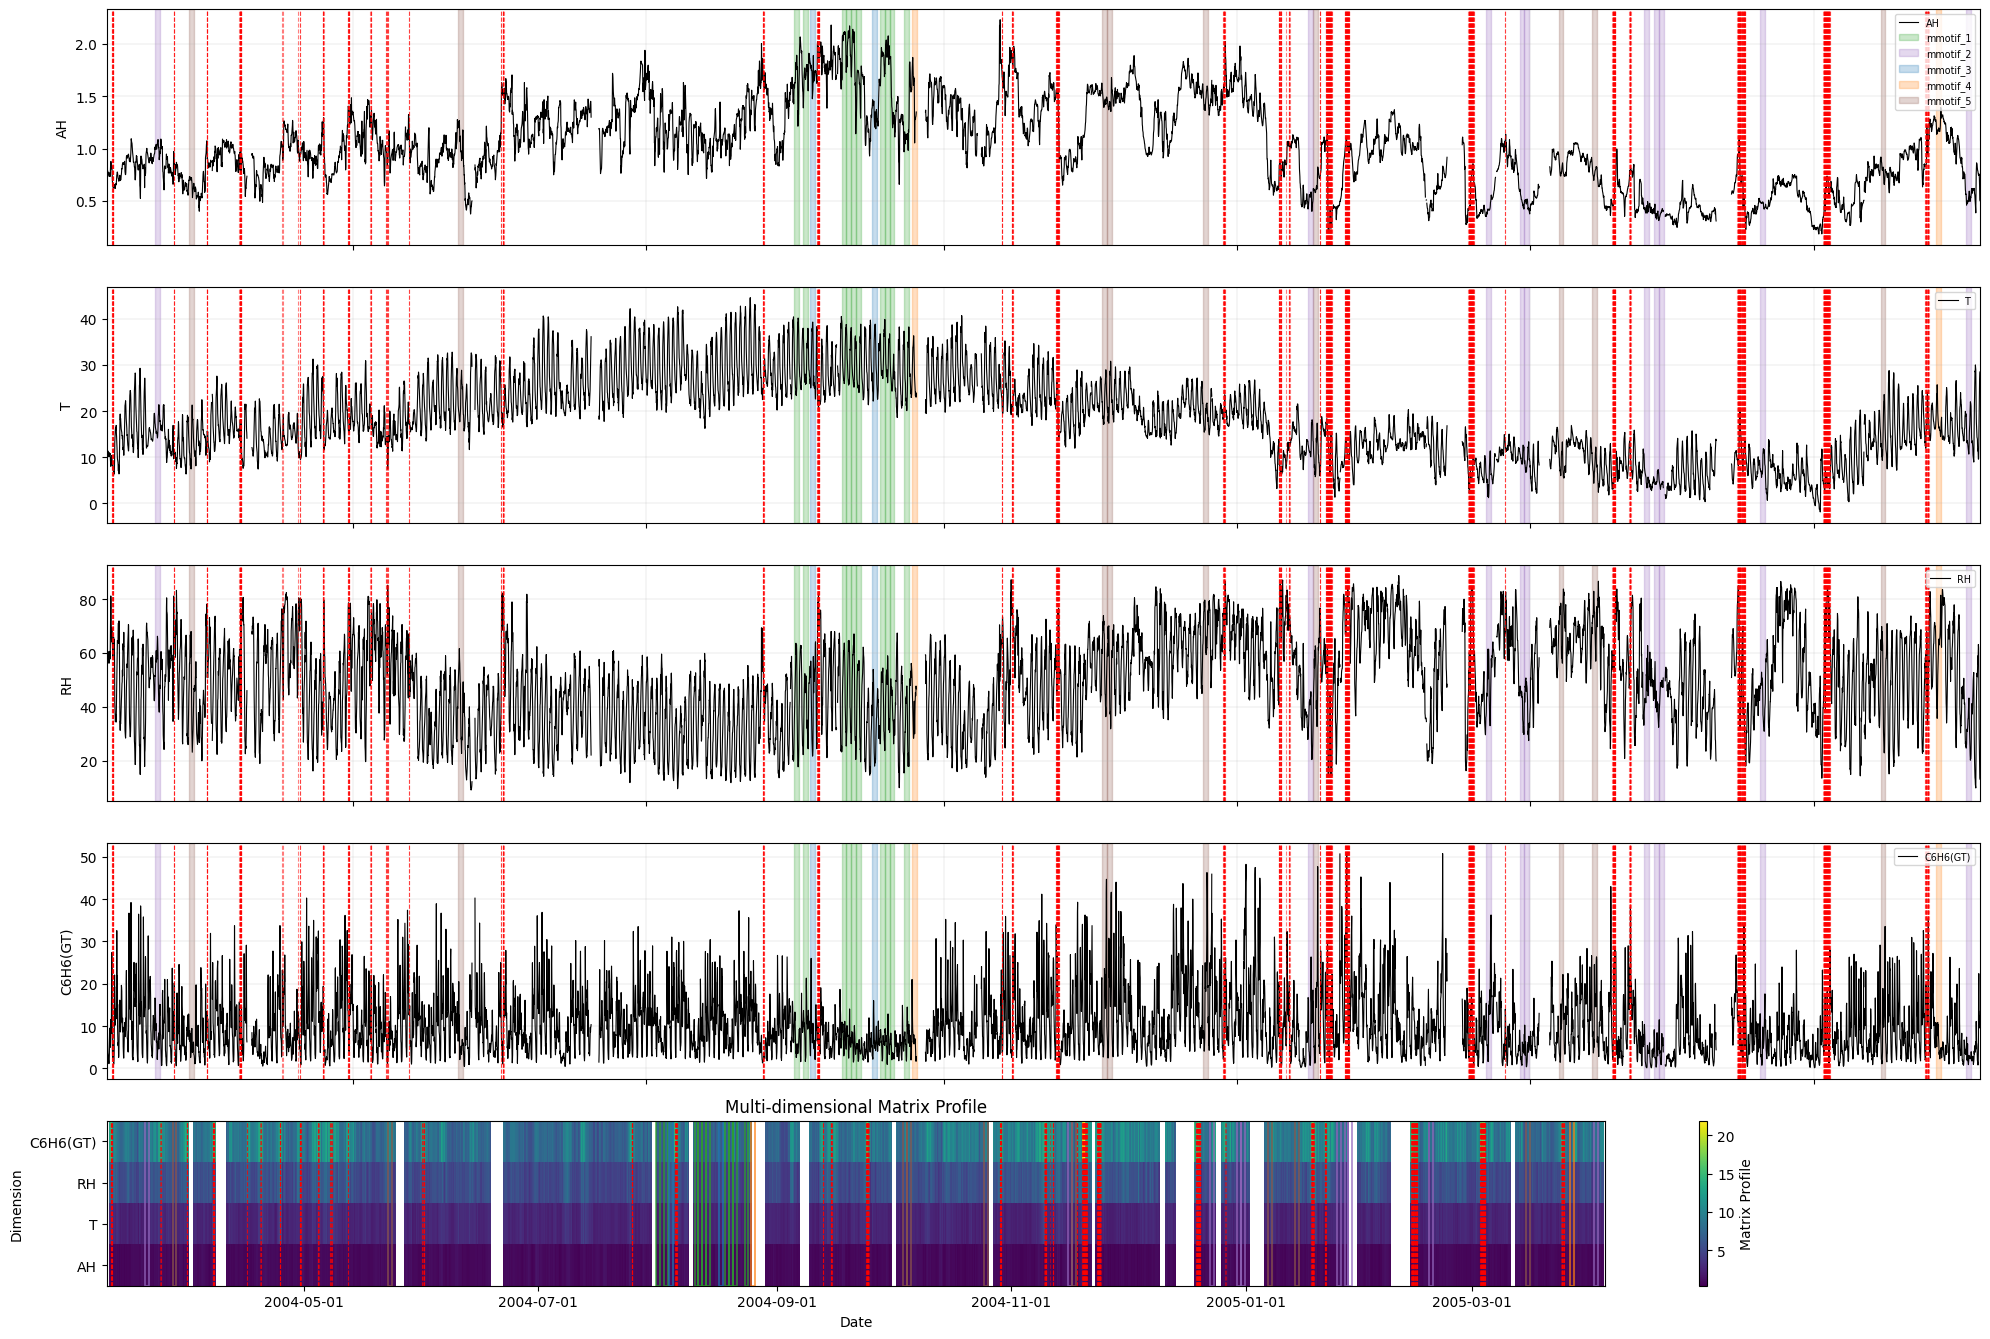

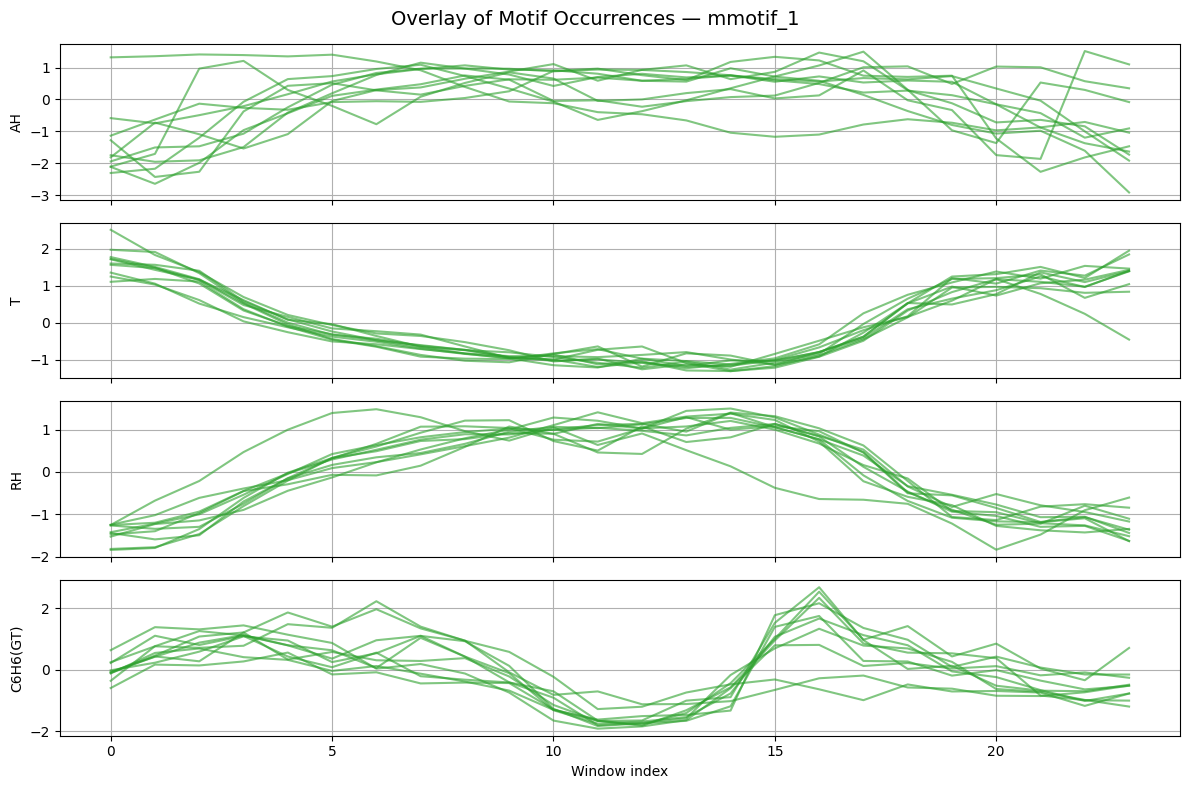

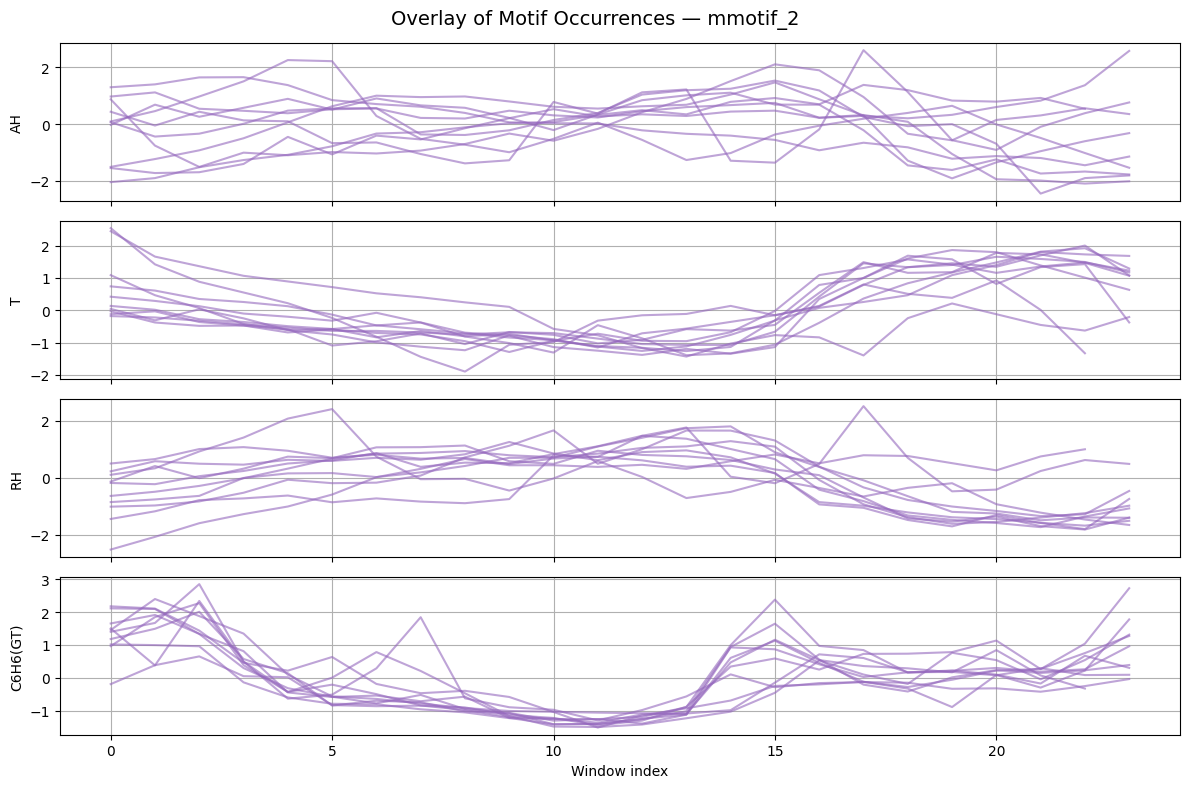

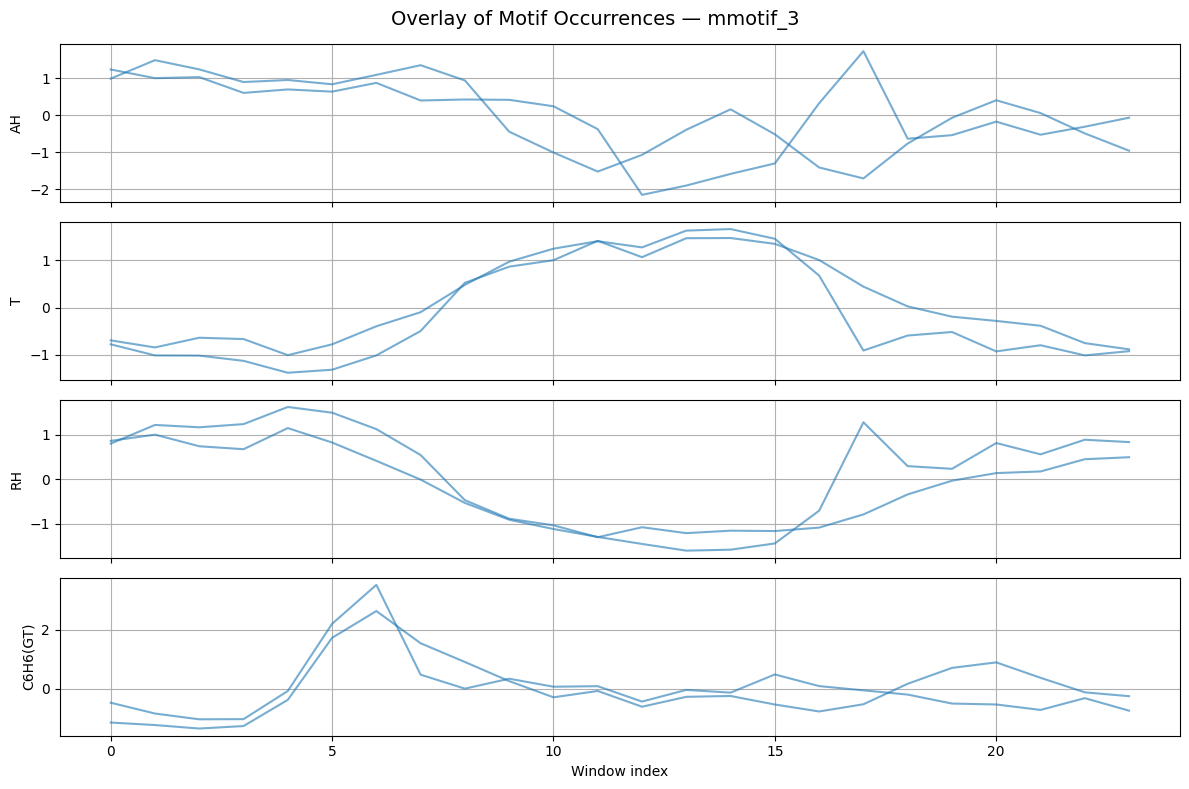

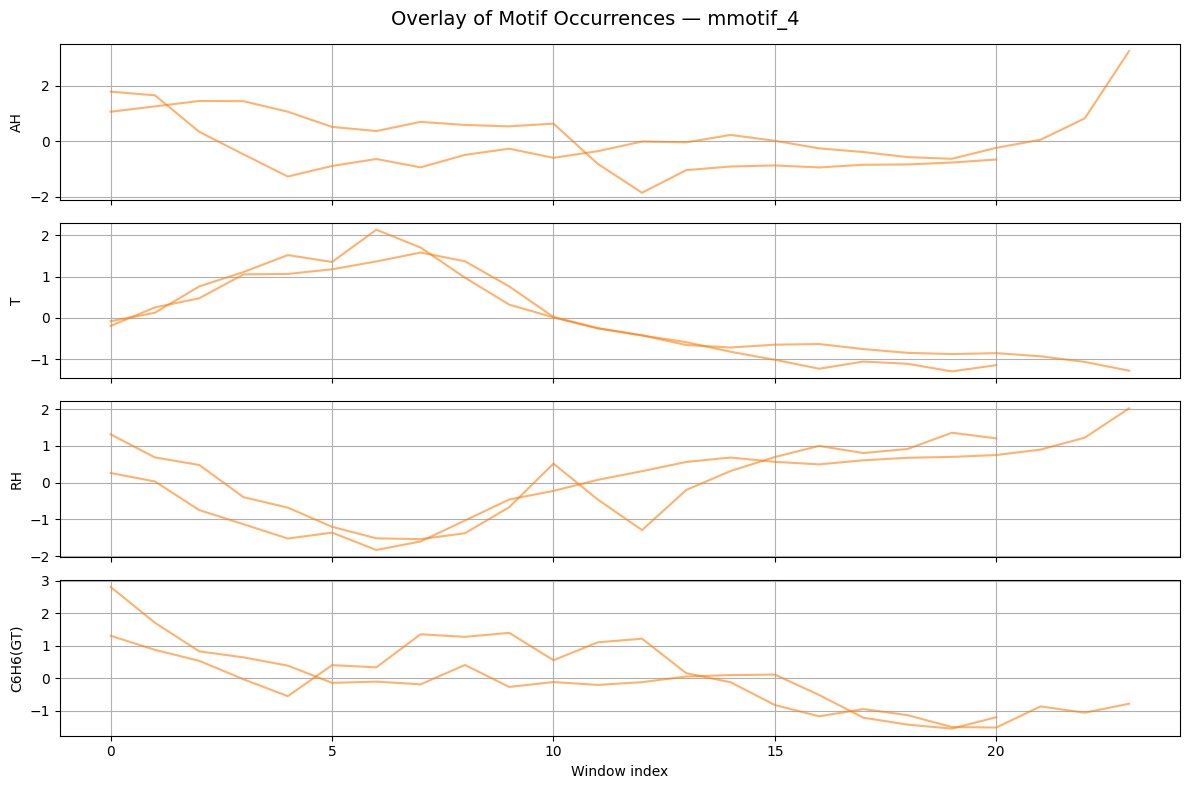

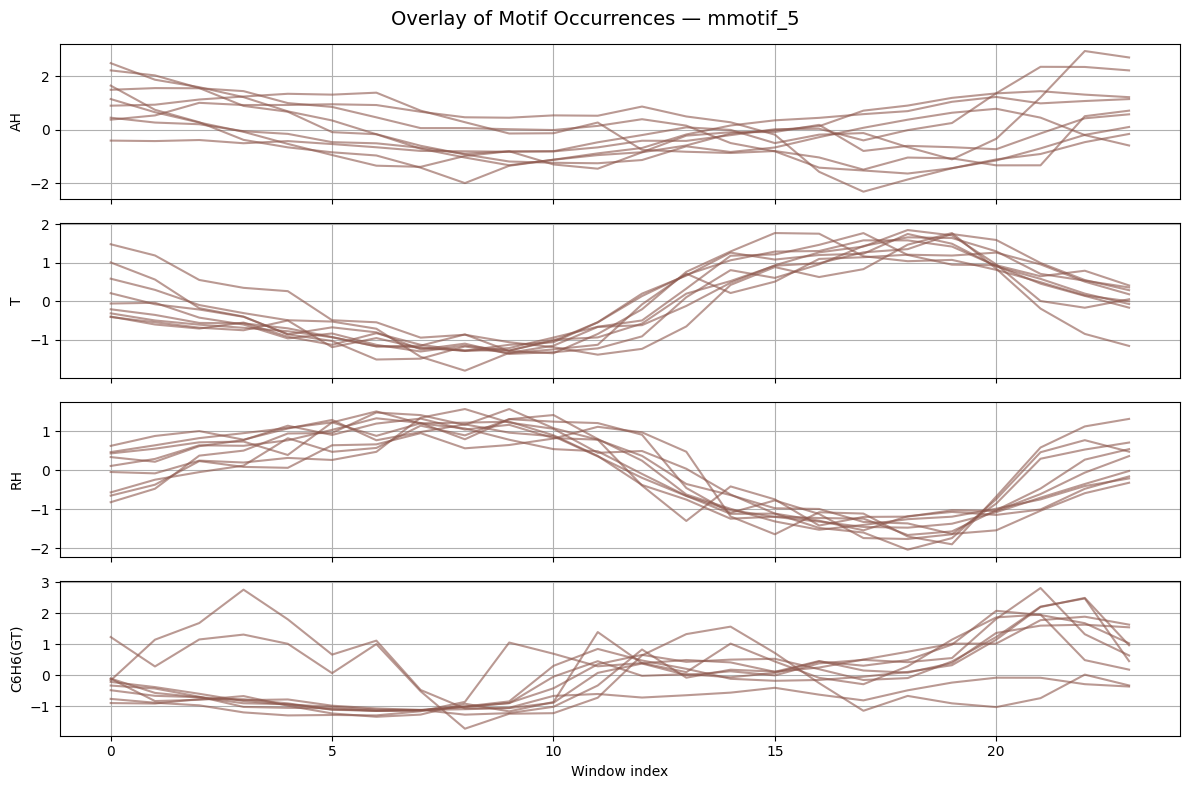

In [2]:
pds = pd.read_csv("../../dataset/air_quality/AirQualityUCI.csv")

pds_normalized = ampiimts.pre_processed(pds, sort_by_variables=False, window_size="24h")
mx_profile = ampiimts.matrix_profile(pds_normalized)


ampiimts.plot_multidim_patterns_and_discords(ampiimts.interpolate(pds), mx_profile)
ampiimts.plot_motif_overlays(ampiimts.interpolate(pds), mx_profile)


14
14
[WINDOW] Fenêtre retenue (meilleure) → 0 days 10:00:00
[MDL] Dimensions retenues : [np.int64(8), np.int64(6), np.int64(1), np.int64(7)] sur [0, 1, 2, 3, 4, 5, 6, 7, 8]


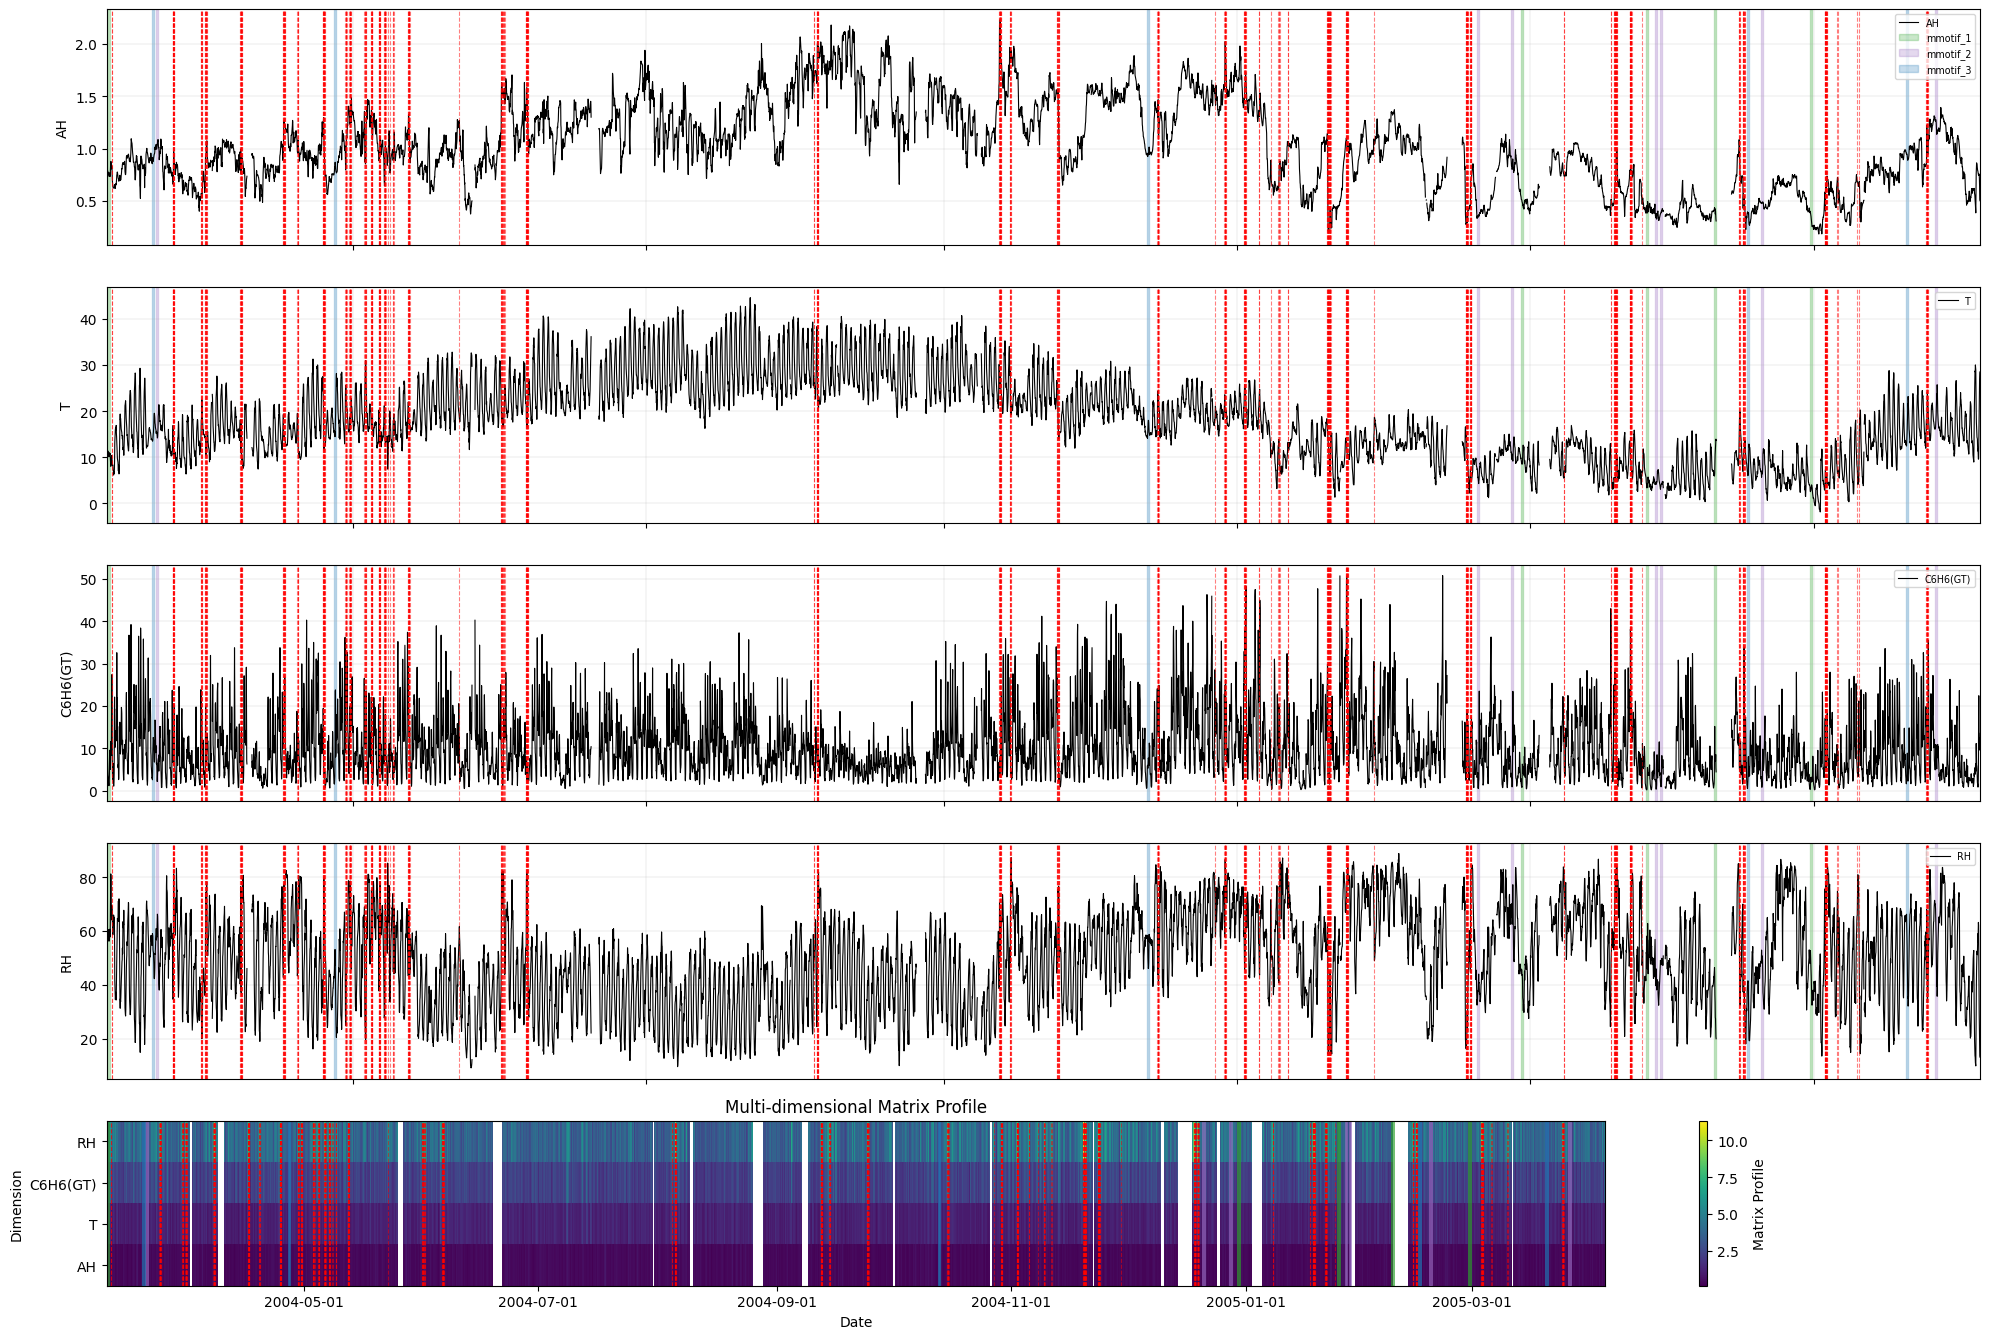

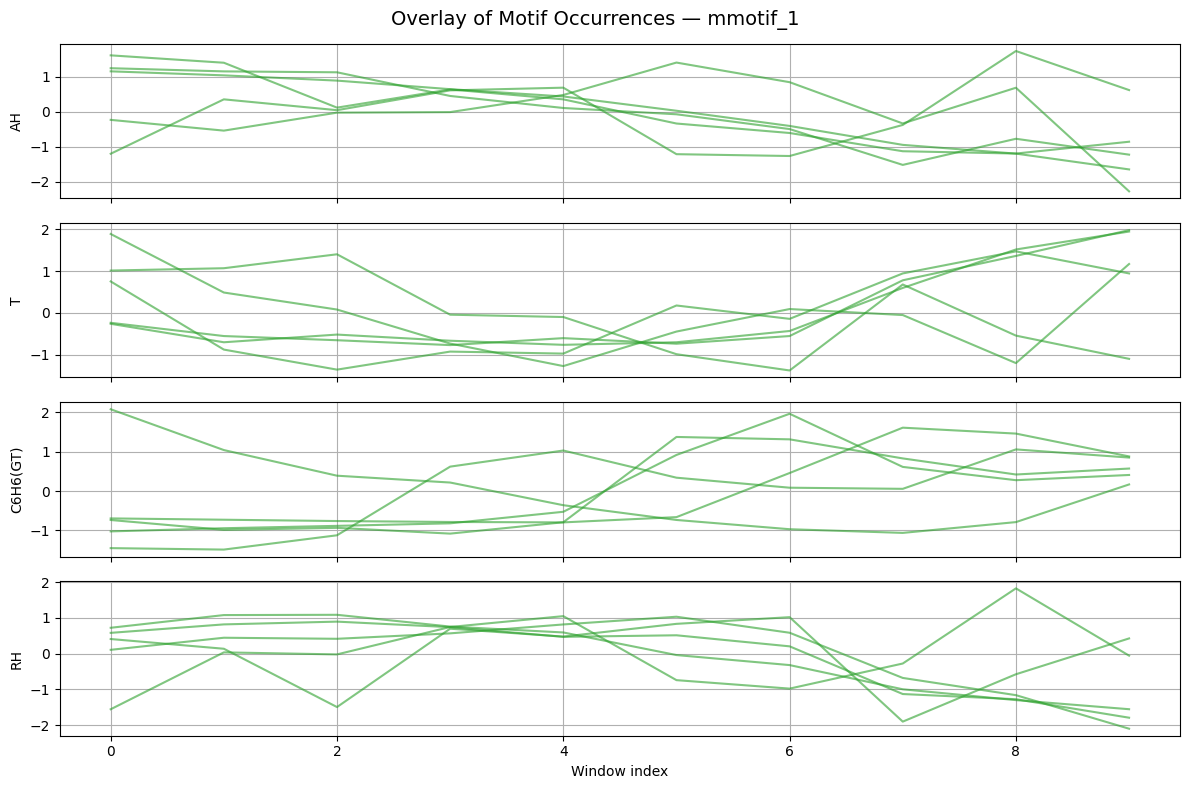

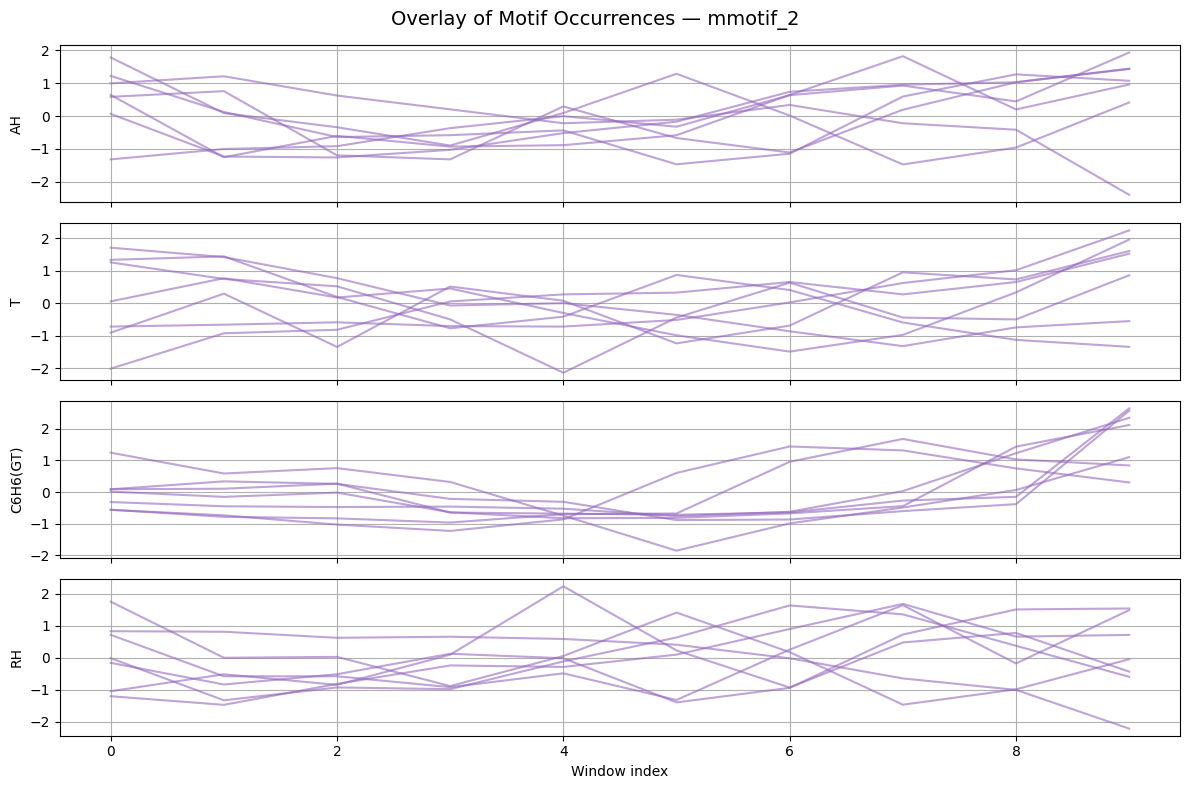

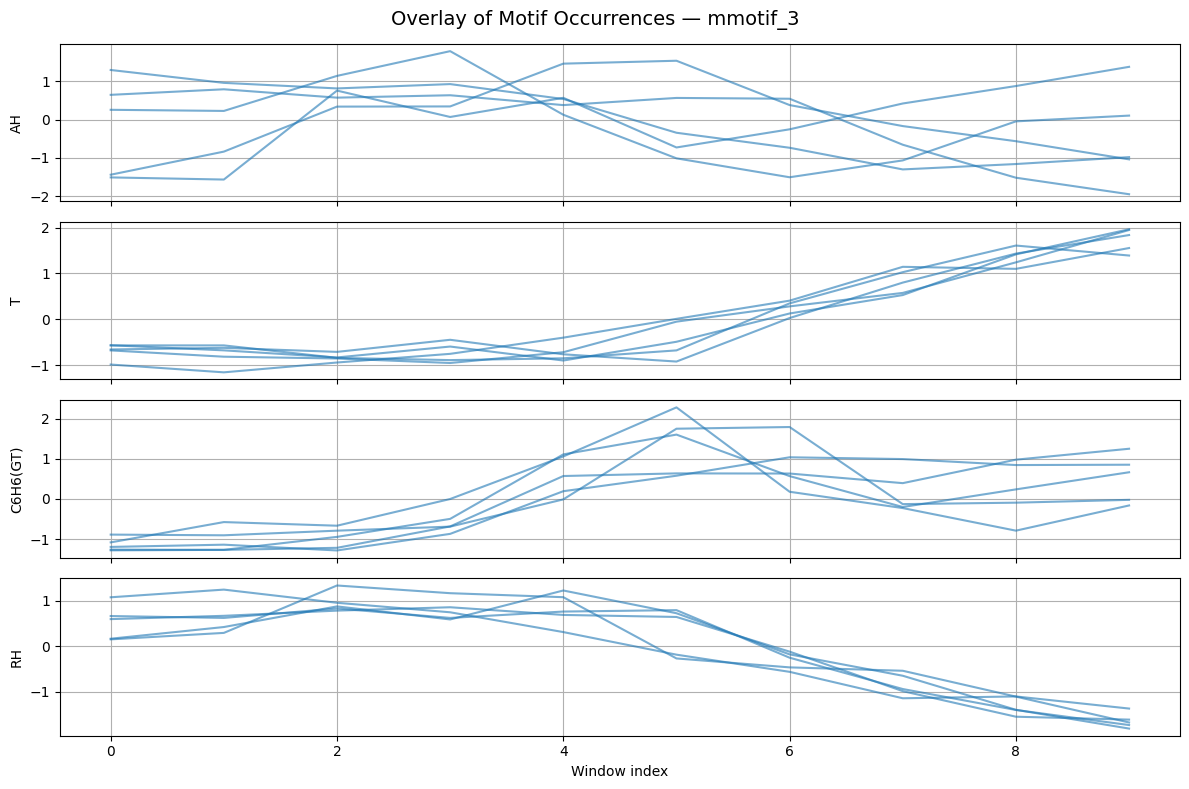

In [4]:
pds = pd.read_csv("../../dataset/air_quality/AirQualityUCI.csv")
print(len(pds.columns))
print(len(pds.columns))
pds = pds.copy()


pds_normalized = ampiimts.pre_processed(pds, sort_by_variables=False)
mx_profile = ampiimts.matrix_profile(pds_normalized)

ampiimts.plot_multidim_patterns_and_discords(ampiimts.interpolate(pds), mx_profile)
ampiimts.plot_motif_overlays(ampiimts.interpolate(pds), mx_profile)


In [ ]:
print(len(mx_profile["matrix_profile"]))
print(len(pds_normalized))
print(len(ampiimts.interpolate(pds)))

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

def plot_motif_overlays(df, result, normalize=True):
    """
    Pour chaque motif détecté, affiche ses occurrences superposées par dimension.
    """
    window_size = result["window_size"]
    patterns = result["patterns"]
    profile_df = result["matrix_profile"]

    # 1) Extraire les noms des colonnes originales à partir du matrix_profile
    original_cols = [col.replace("mp_dim_", "") for col in profile_df.columns]
    df = df.loc[:, original_cols]

    n_dim = df.shape[1]
    motif_colors = ["tab:green", "tab:purple", "tab:blue", "tab:orange", "tab:brown", "tab:pink"]

    for i, pat in enumerate(patterns):
        fig, axs = plt.subplots(n_dim, 1, figsize=(12, 2 * n_dim), sharex=True)
        if n_dim == 1:
            axs = [axs]
        motif_label = pat["pattern_label"]
        indices = pat["motif_indices_debut"]
        c = motif_colors[i % len(motif_colors)]

        for dim, col in enumerate(df.columns):
            ax = axs[dim]
            for idx in indices:
                if idx + window_size > len(df):
                    continue  # Sécurité anti-dépassement
                segment = df.iloc[idx:idx + window_size, dim]
                if normalize:
                    segment = (segment - segment.mean()) / (segment.std() + 1e-8)
                ax.plot(np.arange(len(segment)), segment, alpha=0.6, color=c)
            ax.set_ylabel(col)
            ax.grid(True)

        axs[-1].set_xlabel("Window index")
        fig.suptitle(f"Overlay of Motif Occurrences — {motif_label}", fontsize=14)
        plt.tight_layout()
        plt.show()


9357
9357
9357


In [6]:
# #import files
# folder = '../../dataset/pollution'
# pds = []
# with os.scandir(folder) as entries:
#     for entry in entries:
#         if entry.is_file() and entry.name.endswith('csv'):
#             # list of sensors with some parameters -> list[pd.DataFrame[timestamp, value1, value2, etc..., latitude, longitude]]) 
#             pds.append(pd.read_csv(folder+'/'+entry.name))
# len(pds)
# pds = pds[:10]
# and not entry.name.startswith('pollutionData')


# for pd, mx in zip(synchronize_on_common_grid(pds), mx_profile):
#     plot_multidim_patterns_and_discords(pd, mx)



In [7]:
# pds_interpolate = ampiimts.interpolate(pds)
# # pds = pds.set_index("timestamp")  # définit la colonne 'timestamp' comme index

# motif = pds_interpolate["T"].loc["2004-12-15 18:00:00" : "2004-12-16 12:00:00"]
# motif.head()


In [8]:
# import pandas as pd

# # 1) Lire le fichier Excel
# df = pd.read_excel('../../dataset/air_quality/AirQualityUCI.xlsx', sheet_name=0)

# # 2) S’assurer que la colonne Date est bien en datetime (elle l’est souvent déjà)
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# # 3) Créer un timedelta à partir de la colonne Time
# #    On cast en str au cas où ce soit déjà un datetime.time
# df['TimeDelta'] = pd.to_timedelta(df['Time'].astype(str))

# # 4) Construire la colonne Timestamp
# df['timestamp'] = df['Date'] + df['TimeDelta']

# # 5) (Optionnel) Supprimer la colonne intermédiaire
# df.drop(columns=['TimeDelta', 'Date', 'Time'], inplace=True)

# # 6) Enregistrer en CSV
# df.to_csv('../../dataset/air_quality/AirQualityUCI.csv', index=False)
